In [4]:
spark = SparkSession.builder \
    .appName("BFS") \
    .config("spark.jars.packages", "graphframes:graphframes:0.8.4-spark3.5-s_2.12") \
    .getOrCreate()
    

In [3]:
from pyspark.sql import SparkSession
from graphframes import GraphFrame

In [5]:
vertices = spark.createDataFrame([
    ("A", "Cidade A"),
    ("B", "Cidade B"),
    ("C", "Cidade C"),
    ("D", "Cidade D"),
    ("E", "Cidade E")
], ["id", "nome"])

In [6]:
edges = spark.createDataFrame([
    ("A", "B"),
    ("B", "C"),
    ("A", "D"),
     ("A", "E"),
    ("D", "E"),
    ("E", "C"),
    ("E", "C")
], ["src", "dst"])

In [7]:
g = GraphFrame(vertices,edges)

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

In [9]:
edges_list = g.edges.select("src", "dst").rdd.map(lambda row: (row.src, row.dst)).collect()


In [10]:
nx_graph = nx.Graph()  # ou nx.Graph() se for não-direcionado
nx_graph.add_edges_from(edges_list)

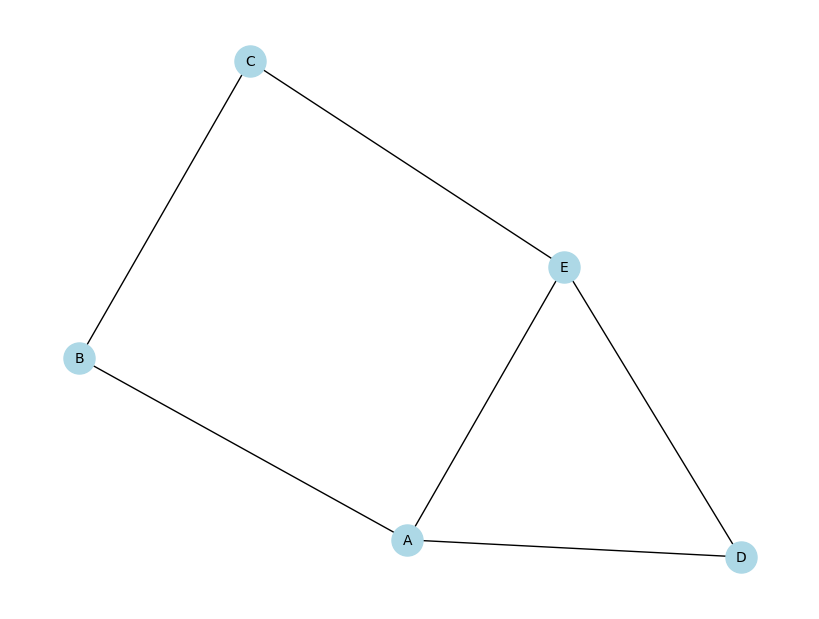

In [11]:
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(nx_graph)
nx.draw(nx_graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
plt.show()

In [21]:
resultado= g.bfs (
    fromExpr="id = 'A'",
    toExpr="id = 'C'"
)

In [22]:
resultado.show()

+-------------+------+-------------+------+-------------+
|         from|    e0|           v1|    e1|           to|
+-------------+------+-------------+------+-------------+
|{A, Cidade A}|{A, E}|{E, Cidade E}|{E, C}|{C, Cidade C}|
|{A, Cidade A}|{A, E}|{E, Cidade E}|{E, C}|{C, Cidade C}|
|{A, Cidade A}|{A, B}|{B, Cidade B}|{B, C}|{C, Cidade C}|
+-------------+------+-------------+------+-------------+



In [27]:
resultado= g.bfs (
    fromExpr="id = 'A'",
    toExpr="id = 'C'",
    maxPathLength=3
)

In [28]:
resultado.show()

+-------------+------+-------------+------+-------------+
|         from|    e0|           v1|    e1|           to|
+-------------+------+-------------+------+-------------+
|{A, Cidade A}|{A, E}|{E, Cidade E}|{E, C}|{C, Cidade C}|
|{A, Cidade A}|{A, E}|{E, Cidade E}|{E, C}|{C, Cidade C}|
|{A, Cidade A}|{A, B}|{B, Cidade B}|{B, C}|{C, Cidade C}|
+-------------+------+-------------+------+-------------+

